In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import logistic

In [3]:
madelon = logistic.PyDataset("madelon", "/Users/jb/data/madelon.txt", 2000, 500, False)
rcv1 = logistic.PyDataset("rcv1", "/mlodata1/jb/data/rcv1_train.binary", 20242, 47236, True)
rcv1_test = logistic.PyDataset("rcv1_test", "/mlodata1/jb/data/rcv1_test.binary", 677399, 47236, True)
epsilon = logistic.PyDataset("epsilon", "/mlodata1/jb/data/epsilon_normalized", 400000, 2000, True)

In [ ]:
rcv1_test.load()

In [ ]:
epsilon.load()

In [ ]:
dataset = rcv1_test

## Theory experiments

### RCV1

In [16]:
models_with_tags = []

model = logistic.PygisticSGD(numEpochs=3, constantLr=False, lr=2., tau=1., lambda_=1. / 677399, weightingScheme='square', useMemory=False, takeK=0, takeTop=False, cores=1)

models_with_tags.append(['sgd', model, "C0-"])

ks = [10, 20, 30]
for i, k in enumerate(ks):
    label = "k={} no delay".format(k)
    model = logistic.PygisticSGD(numEpochs=3, constantLr=False, lr=2., tau=1., lambda_=1. / 677399, weightingScheme='square', useMemory=True, takeK=k, takeTop=False, cores=1)
    models_with_tags.append([label, model, "C{}--".format(i + 1)])
    
    label="k={}".format(k)
    model = logistic.PygisticSGD(numEpochs=3, constantLr=False, lr=2., tau=677399 / k, lambda_=1. / 677399, weightingScheme='square', useMemory=True, takeK=k, takeTop=False, cores=1)
    models_with_tags.append([label, model, "C{}-".format(i + 1)])

label = "top k=10"
model = logistic.PygisticSGD(numEpochs=3, constantLr=False, lr=2., tau=677399 / 10, lambda_=1. / 677399, weightingScheme='square', useMemory=True, takeK=10, takeTop=True, cores=1)
models_with_tags.append([label, model, "C4-"])

In [ ]:
results_rcv1_th2 = {}

for label, model, color in models_with_tags:
    print('run model {}'.format(label))
    results_rcv1_th2[label] = model.fit(rcv1_test)
    print('done')

run model sgd
done
run model k=10 no delay


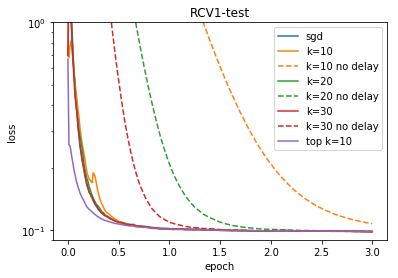

In [20]:
import numpy as np
colors = {
    "sgd": "C0-",
    "k=10": "C1-",
    "k=10 no delay": "C1--",
    "k=20": "C2-",
    "k=20 no delay": "C2--",
    "k=30": "C3-",
    "k=30 no delay": "C3--",
    "top k=10": "C4-"
}

for label, col in colors.items():
    ts, losses, timers = results_rcv1_th2[label]
    plt.semilogy(np.array(ts) / 677399, losses, col, label=label);
    
plt.legend()
plt.title('RCV1-test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0.09, 1.);

### epsilon

In [24]:
models_with_tags = []

lambda_ = 1. / 400000
numEpochs = 1
model = logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=1., lambda_=lambda_, weightingScheme='square', useMemory=False, takeK=0, takeTop=False, cores=1)

models_with_tags.append(['sgd', model, "C0-"])

ks = [1, 2, 3]
for i, k in enumerate(ks):
    label = "k={} no delay".format(k)
    model = logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=1., lambda_=lambda_, weightingScheme='square', useMemory=True, takeK=k, takeTop=False, cores=1)
    models_with_tags.append([label, model, "C{}--".format(i + 1)])
    
    label="k={}".format(k)
    model = logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=677399 / k, lambda_=lambda_, weightingScheme='square', useMemory=True, takeK=k, takeTop=False, cores=1)
    models_with_tags.append([label, model, "C{}-".format(i + 1)])

label = "top k=1"
model = logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=677399 / 1, lambda_=lambda_, weightingScheme='square', useMemory=True, takeK=1, takeTop=True, cores=1)
models_with_tags.append([label, model, "C4-"])

In [25]:
results_epsilon_th = {}
dataset = epsilon

for label, model, color in models_with_tags:
    print('run model {}'.format(label))
    results_epsilon_th[label] = model.fit(dataset)
    print('done')

run model sgd
done
run model k=1 no delay
done
run model k=1
done
run model k=2 no delay
done
run model k=2


KeyboardInterrupt: 

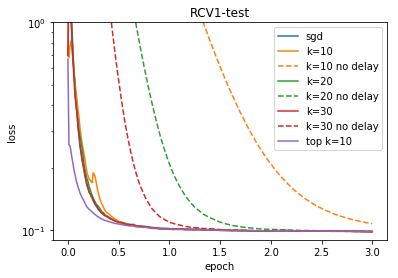

In [20]:
import numpy as np
colors = {
    "sgd": "C0-",
    "k=1": "C1-",
    "k=1 no delay": "C1--",
    "k=2": "C2-",
    "k=2 no delay": "C2--",
    "k=3": "C3-",
    "k=3 no delay": "C3--",
    "top k=1": "C4-"
}

for label, col in colors.items():
    ts, losses, timers = results_rcv1_th2[label]
    plt.semilogy(np.array(ts) / 677399, losses, col, label=label);
    
plt.legend()
plt.title('RCV1-test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0.09, 1.);

## Multicore

### epsilon


In [36]:
cores = [5, 10, 20]

numEpochs = 3
numSamples = 400000
numFeatures = 2000
lambda_ = 1 / numSamples

models = [
    ("rand1", lambda core: logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=numFeatures, 
                                                lambda_=lambda_, weightingScheme='final', useMemory=True, 
                                                takeK=1, takeTop=False, cores=core)),
    ("top1", lambda core: logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=numFeatures, 
                                                lambda_=lambda_, weightingScheme='final', useMemory=True, 
                                                takeK=1, takeTop=True, cores=core)),
    ("sgd", lambda core: logistic.PygisticSGD(numEpochs=numEpochs, constantLr=False, lr=2., tau=1, 
                                                lambda_=lambda_, weightingScheme='final', useMemory=False, 
                                                takeK=0, takeTop=False, cores=core)),
]
     
results = {}

for core in cores:
    for label, builder in models:
        m = builder(core)
        results[(label, core)] = m.fit(epsilon)

In [38]:
baseline = 0.305
processed = {}
for (model, cores), (ts, losses, timers) in results.items():
    index = np.argwhere(np.array(losses) < baseline)[0,0]
#     print(index)
    processed[(model, cores)] = (ts[index], timers[index])
processed

{('rand1', 5): (1200000, 0.0),
 ('rand1', 10): (1200000, 0.0),
 ('rand1', 20): (1200000, 0.0),
 ('sgd', 5): (1200000, 0.0),
 ('sgd', 10): (1200000, 0.0),
 ('sgd', 20): (1200000, 0.0),
 ('top1', 5): (1200000, 0.0),
 ('top1', 10): (1200000, 0.0),
 ('top1', 20): (1200000, 0.0)}

In [35]:
m = models[2][1](24)
ts, losses, timers = m.fit(epsilon)

In [40]:
results

{('rand1',
  5): ([0,
   4000,
   8000,
   12000,
   16000,
   20000,
   24000,
   28000,
   32000,
   36000,
   40000,
   44000,
   48000,
   52000,
   56000,
   60000,
   64000,
   68000,
   72000,
   76000,
   80000,
   84000,
   88000,
   92000,
   96000,
   100000,
   104000,
   108000,
   112000,
   116000,
   120000,
   124000,
   128000,
   132000,
   136000,
   140000,
   144000,
   148000,
   152000,
   156000,
   160000,
   164000,
   168000,
   172000,
   176000,
   180000,
   184000,
   188000,
   192000,
   196000,
   200000,
   204000,
   208000,
   212000,
   216000,
   220000,
   224000,
   228000,
   232000,
   236000,
   240000,
   244000,
   248000,
   252000,
   256000,
   260000,
   264000,
   268000,
   272000,
   276000,
   280000,
   284000,
   288000,
   292000,
   296000,
   300000,
   304000,
   308000,
   312000,
   316000,
   320000,
   324000,
   328000,
   332000,
   336000,
   340000,
   344000,
   348000,
   352000,
   356000,
   360000,
   364000,
   